

## ✅ **ResNet50 모델**
~~~
- 사용 모델: ResNet50 (사전학습 모델 없이 직접 학습)  
- 목적: 깊은 네트워크를 통한 특징 추출로 성능 개선 시도  
- 데이터셋: 소규모 해파리 이미지 데이터셋 (6 클래스)
~~~


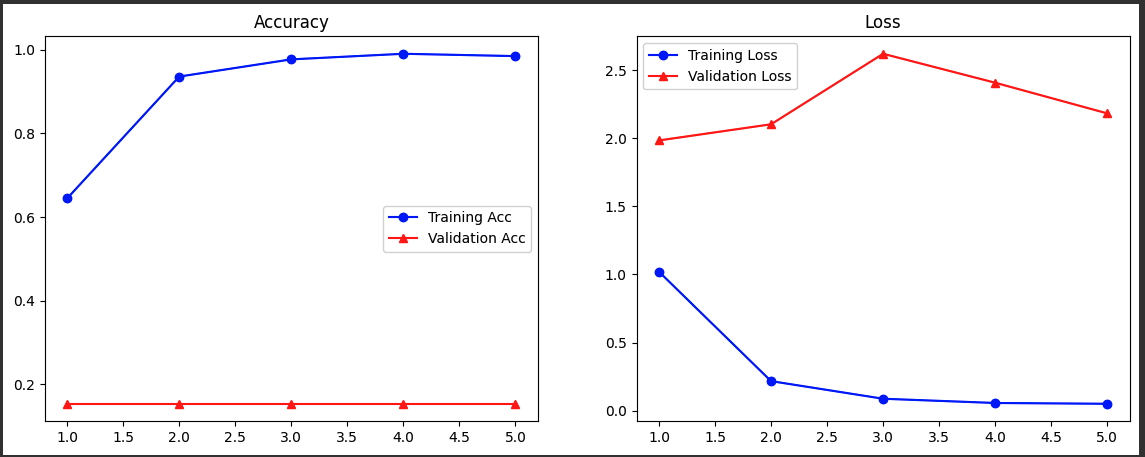


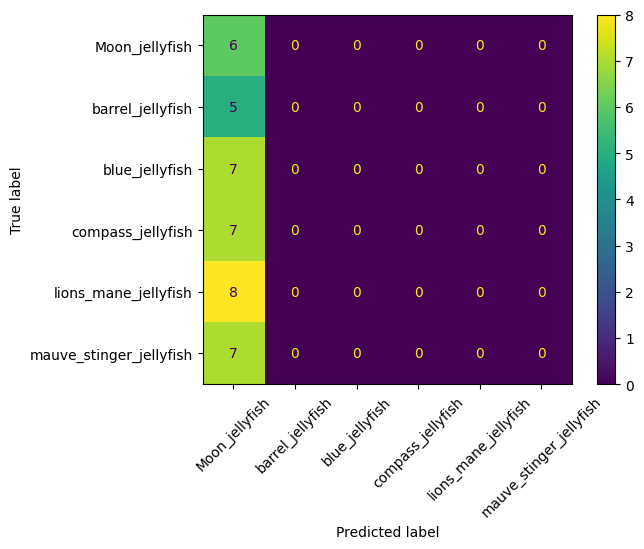

~~~
Found 40 images belonging to 6 classes.
- accuracy: 0.1625 - loss: 2.2134
✅ 테스트 정확도: 15.00%


- 의문점 : 성능이 너무 떨어짐, 각클래스 별로 어떻게 예측했는지 측정 필요
- confusion matrix 사용
~~~



⚠️ 문제점
~~~
	* 전체적으로 모델이 한쪽 클래스에 몰아서 예측하는 현상이 발생.이는 데이터셋이 너무 작고, 사용한 ResNet50 모델이 과하게 복잡하여, 학습이 제대로 되지 못하고 편향된 예측으로 수렴했기 때문.
	* 특히 클래스 불균형 또는 학습 초기에 소수 클래스에 대한 표현 학습 실패로 인해, 모델이 loss를 줄이기 위해 한쪽 클래스만 찍는 식으로 학습된 것으로 보임.
	* 컨퓨전 매트릭스에서도 대부분의 샘플을 한 클래스(예: 클래스 0)로만 예측한 것을 확인.
~~~

🔧 개선 시도
~~~
	* 클래스 불균형 문제를 고려하여 class_weight='balanced' 등의 가중치 적용을 시도함.
  * 다양한 하이퍼파라미터 조정, EarlyStopping 등 학습 안정화 시도
~~~

🎯 **결과**
~~~
* `Test Accuracy: 약 17%`  
* 클래스 예측이 한쪽에 쏠리는 bias 경향 지속  
* CNN 모델보다도 성능이 낮거나 비슷한 수준
~~~



🧠 **결론**
~~~
* ResNet50은 복잡하고 강력한 구조지만, **소규모 데이터에서는 오히려 성능이 저하됨**  
* 사전학습 없이 처음부터 학습할 경우, **데이터 부족으로 일반화가 되지 않음**  
* 따라서, 소규모 데이터셋에서는 경량화된 구조나 **사전학습된 모델을 기반으로 한 fine-tuning이 더 효과적**  
* 본 실험을 통해, **데이터의 크기와 성격에 맞는 모델 선택이 중요함**을 확인함
~~~

---



## ✅ **CNN 모델**
~~~
- 사용 모델: 커스텀 CNN 모델 (사전학습 없이 직접 학습)  
- 목적: 기본적인 합성곱 신경망 구조를 통해 해파리 이미지 분류 시도  
- 데이터셋: 소규모 해파리 이미지 데이터셋 (6 클래스)
~~~
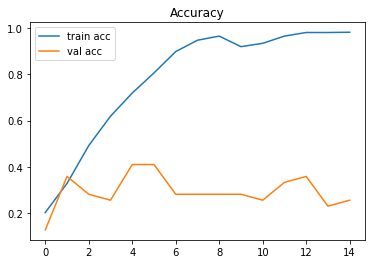


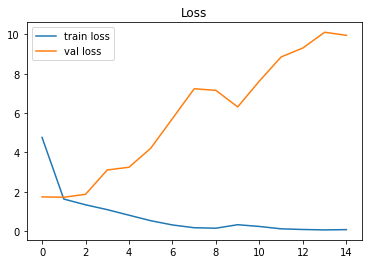

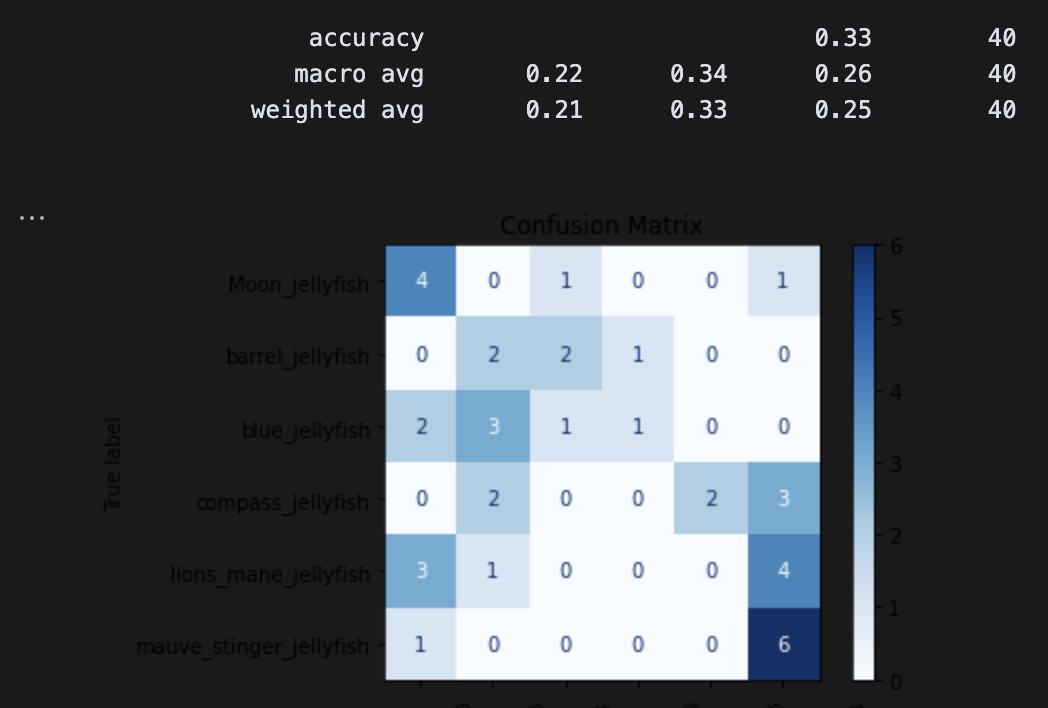


⚠️ 문제점

	* CNN으로 학습했지만, 데이터셋 크기가 작고, 클래스 간 불균형 가능성이 높아 성능이 크게 오르지 않음.
	* ResNet50처럼 복잡한 모델은 아니지만, 여전히 한쪽 클래스에 예측을 몰아주는 bias 경향이 존재함.
	* 학습된 모델이 테스트셋에서도 낮은 성능을 보여, 일반화 성능이 떨어짐.


🔧 개선 시도
	* 베이스라인 성능 향상 시도
	* 모델의 깊이를 증가 시키기 - conv 레이어 2배로 늘리기.
	* 콜백 설정: val_accuracy 기준으로 최고 성능 모델 저장

Test accuracy: 0.7000, Test loss: 1.5147
70%로 성능 개선


🧠 결론

	* 모델 구조 간 복잡도 차이와 무관하게, 작은 데이터셋에서는 성능이 제한됨
	* 기본 CNN 구조로 매우 작은 데이터셋을 학습하는데의 한계점을 느껴, 사전 훈련된 모델 불러오기 >>ConvNeXt

---

## ✅ **ConvNeXt 모델**
~~~
- 사용 모델: ConvNeXt Tiny (사전학습된 모델 기반 fine-tuning)  
- 목적: 사전학습된 고성능 구조를 활용해 소규모 데이터셋에서도 높은 정확도 확보  
- 데이터셋: 소규모 해파리 이미지 데이터셋 (6 클래스)
~~~
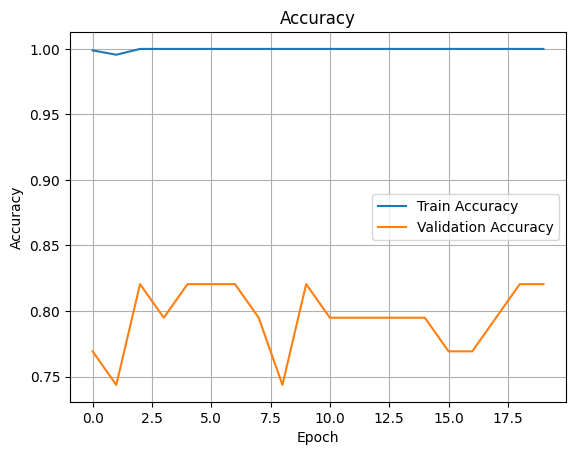

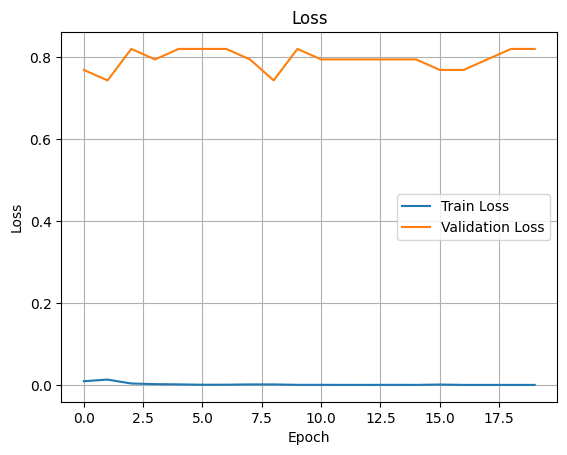

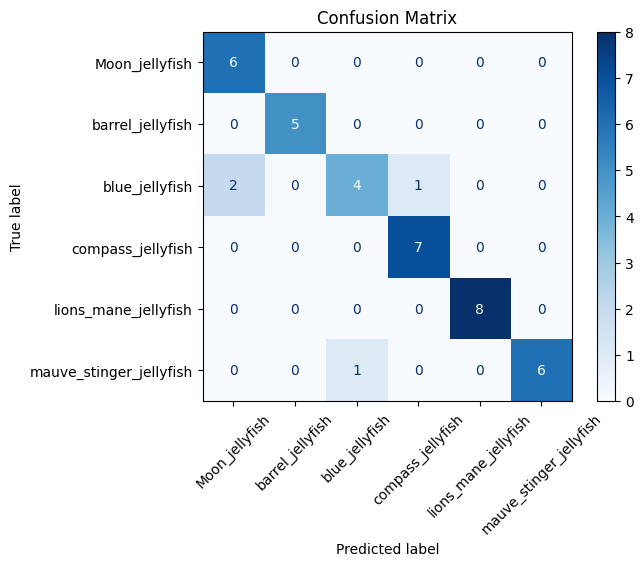




🎯 결과
~~~
Test Accuracy: 0.9000
→ 기존 70에서 **90% 정확도 달성**하며 성능 개선 확인
~~~


🧠 결론
~~~
* 모델 구조의 복잡도보다 **데이터 크기와 품질이 성능에 더 큰 영향**을 줌  
* 하지만 소규모 데이터셋이라도, **사전학습된 ConvNeXt 모델을 활용한 fine-tuning**은 훨씬 효과적임  
* 실제로, 기존 CNN 모델은 **Test Accuracy 70%**에 머물렀던 반면, ConvNeXt 모델은 **90%까지 도달**하며 **확실한 성능 향상**을 보임  
* 이는 ConvNeXt가 **이미 풍부한 일반 패턴을 학습한 상태에서, 적은 양의 데이터만으로도 빠르게 적응**할 수 있었기 때문  
* 따라서, 소규모 데이터셋을 다룰 때는 단순한 모델 설계보다 **사전학습 기반 모델의 활용이 더욱 강력한 전략**임을 확인함
~~~
---





## ✅ **MobileNetV2 모델**

- 사용 모델: `MobileNetV2` (사전학습 모델 기반 fine-tuning)  
- 목적: 경량화된 구조로 고성능 유지하며 정확도 확보  
- 데이터셋: 해파리 이미지, 총 6개 클래스  



⚠️ **문제점**
~~~
* 기존 CNN은 단순하고 데이터가 적은 환경에서는 성능이 낮았고,  
  특정 클래스에 bias가 몰리는 현상 발생  
* 모델의 표현력이 낮아, 일반화가 잘 되지 않음  
* 정확도가 70% 수준에 머무르며, 실사용에 어려움이 있음  
~~~


🔧 **개선 시도**
~~~
* MobileNetV2는 **경량 구조이면서도 사전학습된 일반 시각 특성 보유**  
* 출력층만 해파리 클래스에 맞게 수정하여 fine-tuning 진행  
* `EarlyStopping`, `ReduceLROnPlateau` 등 **콜백으로 학습 안정화**  
* 훈련 중 과적합 방지를 위한 **적절한 regularization 적용**
~~~


🎯 **결과**
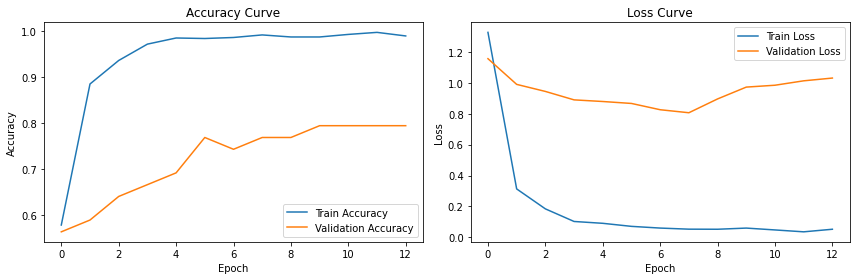


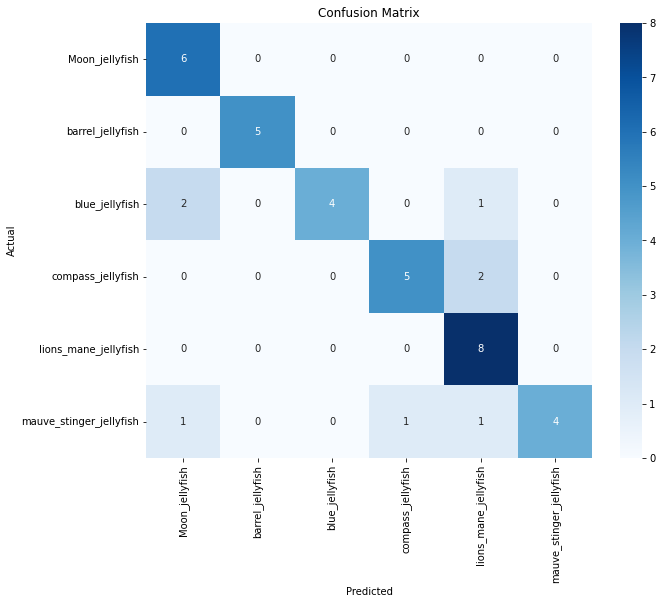
~~~
* accuracy: 0.8000
* 테스트 손실: 0.5107
* 테스트 정확도: 0.8000
~~~

🔧 **성능 개선 시도**
~~~
* 이미지 로드 및 전처리 수행
* 배치 차원 추가
~~~

최종 결과
~~~
* `Test Accuracy: 약 90%`
* 기존 CNN 대비 **20%p 이상의 성능 향상**  
* 혼동 행렬에서도 클래스별 예측 성능이 안정적으로 분포됨  
* 예측 이미지 예시에서도 높은 정확도와 신뢰도 확인
~~~
---

🧠 **결론**

~~~
* MobileNetV2는 사전학습된 구조 덕분에 **소규모 데이터셋에서도 높은 성능을 발휘**  
* 해파리 데이터셋에 특화된 훈련 없이도, 일반 이미지로부터 학습한 시각 정보 덕분에  
  **빠르게 적응하며 일반화 성능을 확보함**  
* CNN 대비 훨씬 가볍고 효율적인 구조이면서도 **정확도는 90% 이상으로 향상**,  
  실사용 가능성을 높인 결과를 얻음
~~~
